## **`3. Dice Recognition`**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


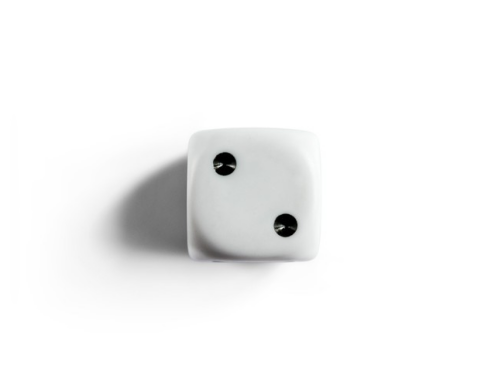

In [2]:
img = cv2.imread('0.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

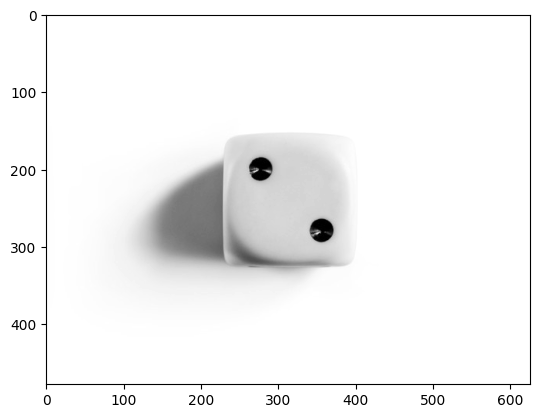

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')   
# plt.axis('off')
plt.show()

[[[355.85     278.85      15.67    ]
  [275.55002  198.55      15.889999]]]


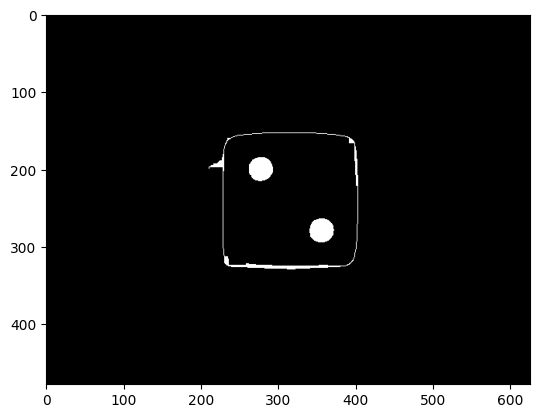

In [4]:
#edges = cv2.Canny(gray_img,15,150,0)
# blur = cv2.medianBlur(gray_img, 3)
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpen = cv2.filter2D(gray_img, -1, sharpen_kernel)

detected_edges = cv2.Canny(img_gray,9, 150, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=2)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,1.1,20,param1=50,param2=30,minRadius=5,maxRadius=55)
print(circles)

plt.imshow(close, cmap='gray')

In [5]:
circles=circles[0,:]
print(circles)

[[355.85     278.85      15.67    ]
 [275.55002  198.55      15.889999]]


2


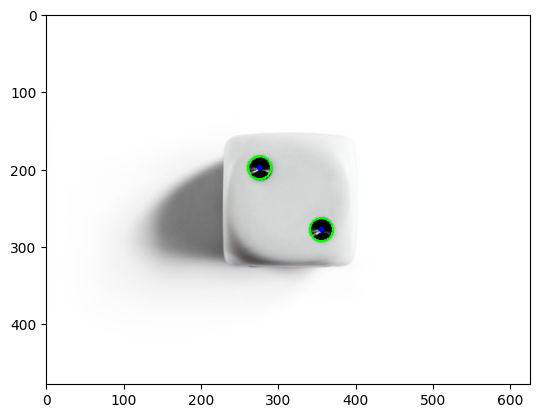

In [6]:
for i in circles:
    # draw the outer circle
    cv2.circle(img_rgb,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_rgb,(int(i[0]),int(i[1])),2,(0,0,255),3)

print(len(circles))
plt.imshow(img_rgb)
plt.show()

In [7]:
contours, hierarchy = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
print(len(contours))
print((hierarchy[0]))

1
[[-1 -1 -1 -1]]


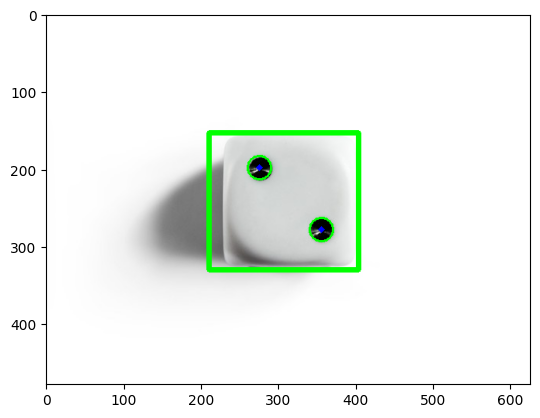

In [10]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(img_rgb, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

plt.imshow(img_rgb)

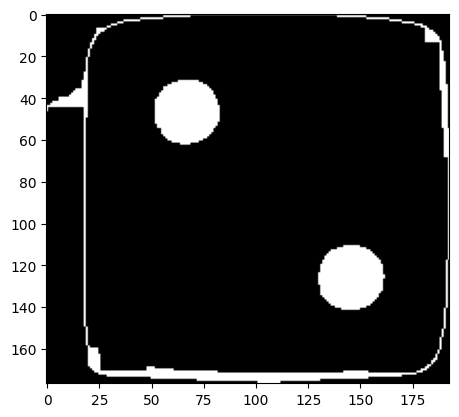

In [11]:
dice0 = close[y0:y0+h0, x0:x0+w0]

plt.imshow(dice0, cmap='gray')
plt.show()

In [12]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.3,20,param1=50,param2=30,minRadius=5,maxRadius=55)
print(len(circles0[0]))

2


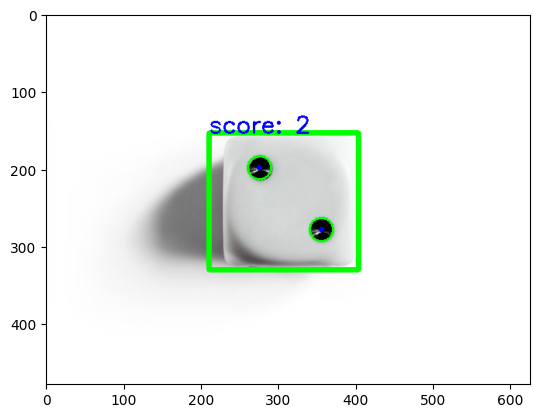

In [13]:
cv2.putText(img_rgb, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(img_rgb)
plt.show()

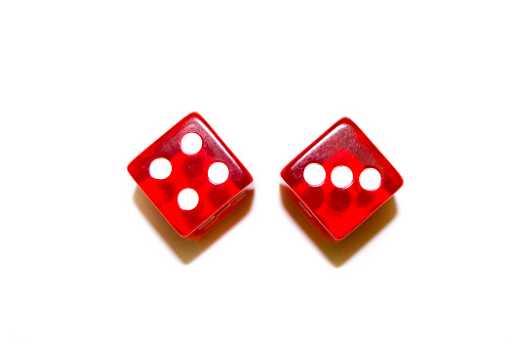

In [15]:
#2
img = cv2.imread('1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

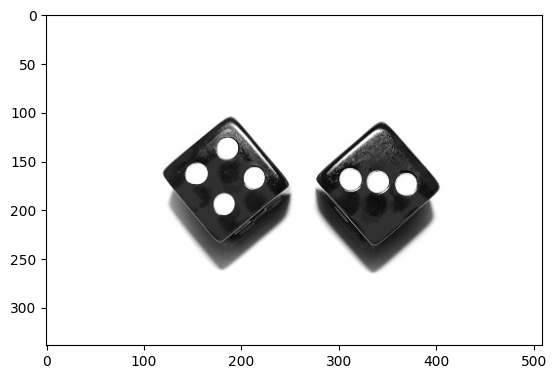

In [16]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

[[[311.40002  168.6       11.52    ]
  [153.       162.6       11.280001]
  [186.6      138.6       10.56    ]
  [213.00002  168.6       10.56    ]
  [339.       171.        10.8     ]
  [180.6      192.6       10.92    ]
  [369.       175.8       10.56    ]]]


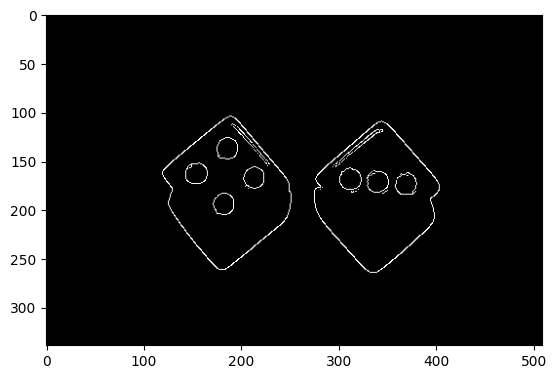

In [17]:
thresh = cv2.threshold(img_gray,220,255, cv2.THRESH_BINARY_INV)[1]


detected_edges = cv2.Canny(thresh,9, 150, 3)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
#close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=1)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(circles)

plt.imshow(detected_edges, cmap='gray')
plt.show()

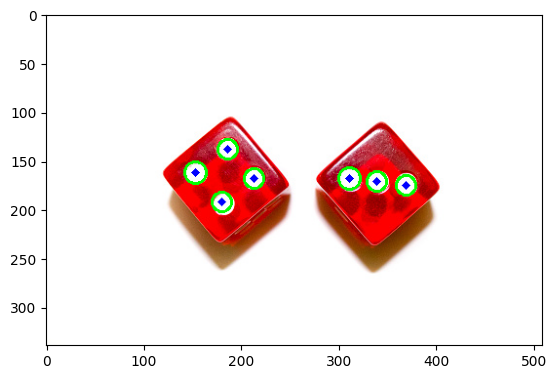

In [18]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(img_rgb,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_rgb,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(img_rgb)
plt.show()

In [19]:
contours, hierarchy = cv2.findContours(detected_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
print(len(contours))
print((hierarchy[0]))

2
[[ 1 -1 -1 -1]
 [-1  0 -1 -1]]


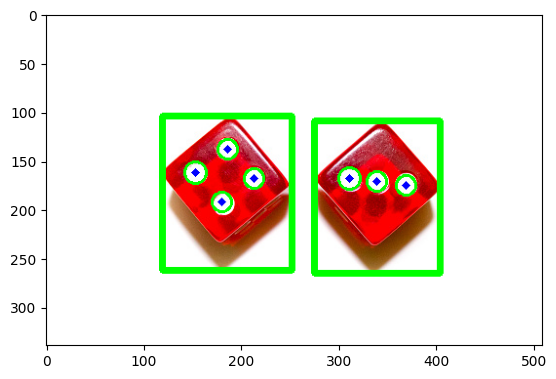

In [21]:
# since we have 2 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(img_rgb, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(img_rgb, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)


plt.imshow(img_rgb)

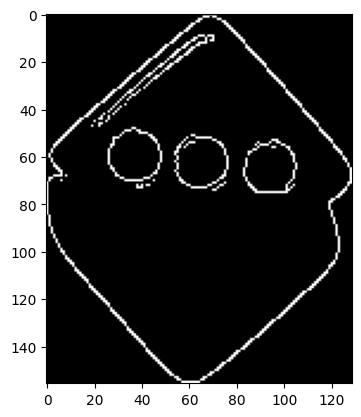

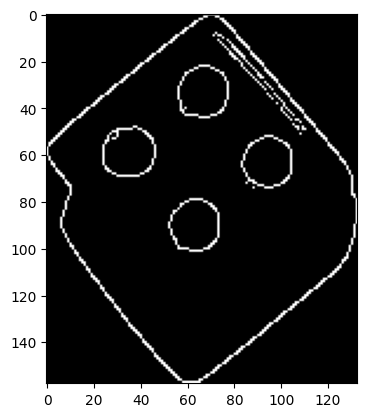

In [22]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()

In [23]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]))

3 4


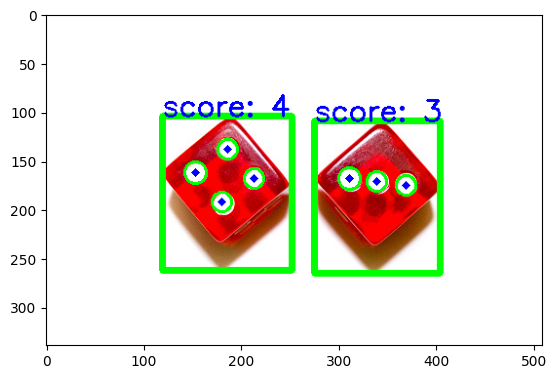

In [24]:
cv2.putText(img_rgb, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(img_rgb, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(img_rgb)
plt.show()

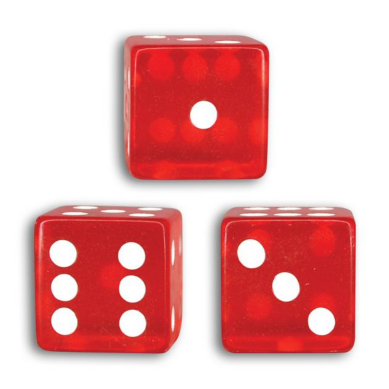

In [60]:
#3. 
img = cv2.imread('2.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

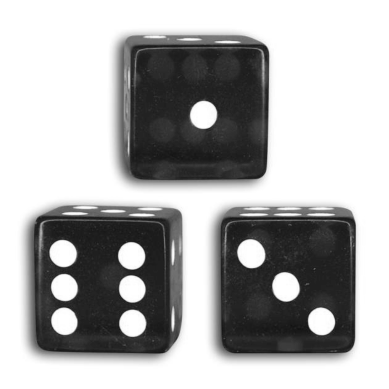

In [61]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

10


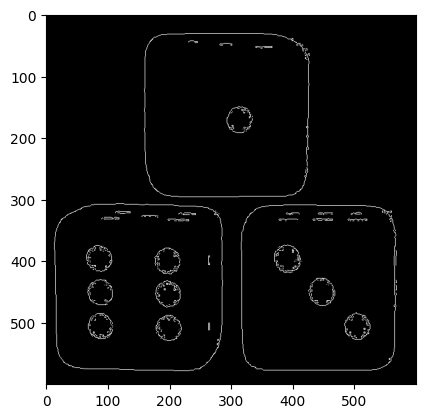

In [62]:
thresh = cv2.threshold(img_gray,250,255, cv2.THRESH_BINARY_INV)[1]


detected_edges = cv2.Canny(thresh,9, 150, 3)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
#close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=1)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles[0]))

plt.imshow(detected_edges, cmap='gray')
plt.show()

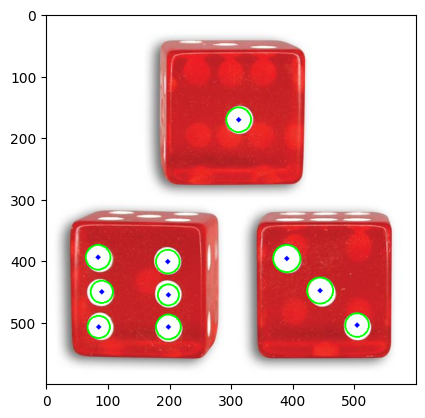

In [63]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(img_rgb,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_rgb,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(img_rgb)
plt.show()

In [64]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dil = cv2.dilate(detected_edges,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [65]:
print(len(contours))
print((hierarchy[0]))

3
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [-1  1 -1 -1]]


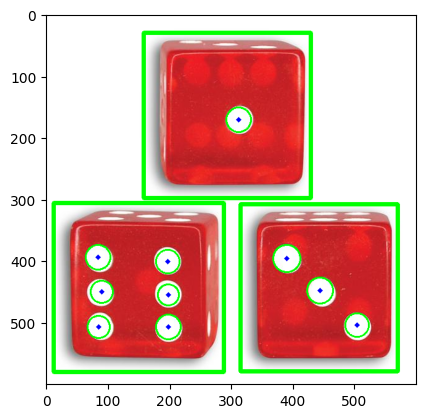

In [66]:
# since we have 3 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(img_rgb, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(img_rgb, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)

x2, y2, w2, h2= cv2.boundingRect(contours[2])
cv2.rectangle(img_rgb, (x2,y2),(x2+w2,y2+h2), (0,255,0),5)


plt.imshow(img_rgb)

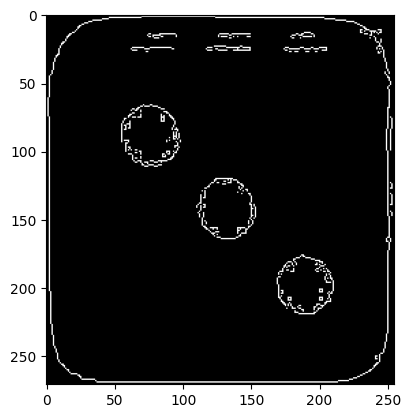

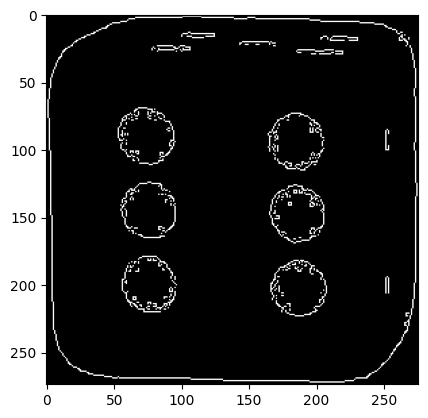

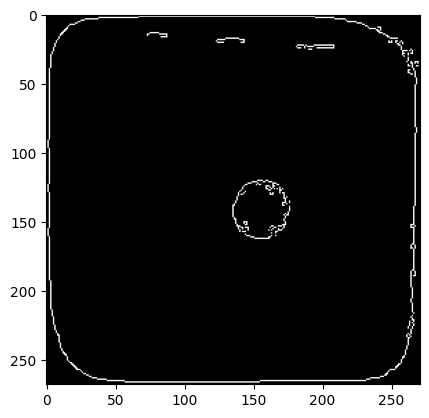

In [67]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]
dice2 = detected_edges[y2:y2+h2, x2:x2+w2]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()
plt.imshow(dice2, cmap='gray')
plt.show()

In [68]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles2 = cv2.HoughCircles(dice2,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]), len(circles2[0]))

3 6 1


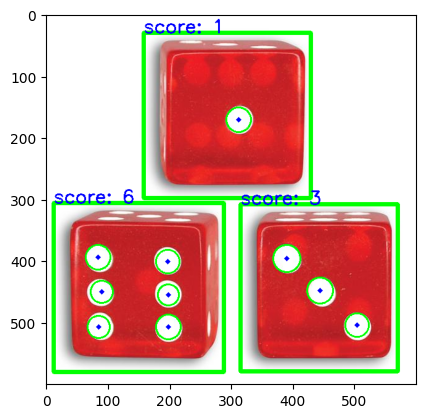

In [69]:
cv2.putText(img_rgb, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(img_rgb, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(img_rgb, f'score: {len(circles2[0])}', (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(img_rgb)
plt.show()

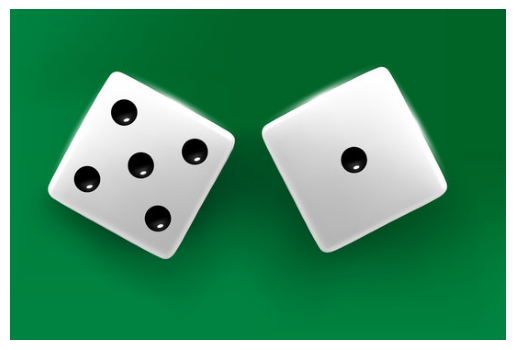

In [46]:
#4
img = cv2.imread('3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

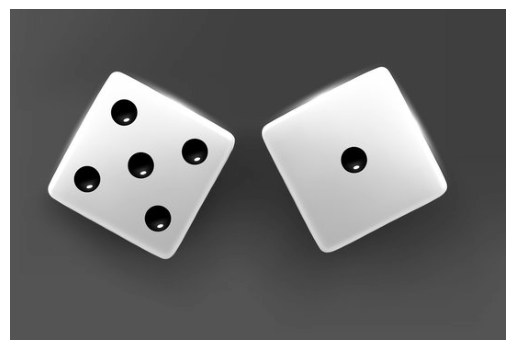

In [47]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

6


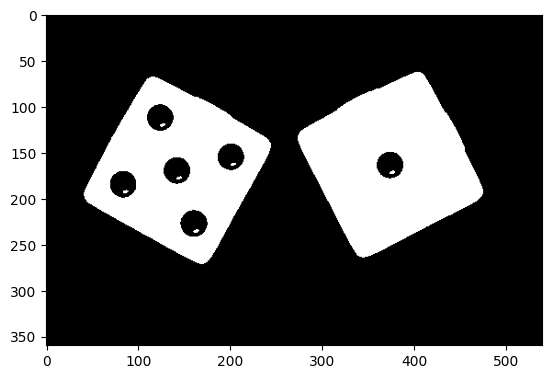

In [48]:
thresh = cv2.threshold(img_gray,150,255, cv2.THRESH_BINARY)[1]


detected_edges = cv2.Canny(thresh,9, 150, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles[0]))

plt.imshow(close, cmap='gray')
plt.show()

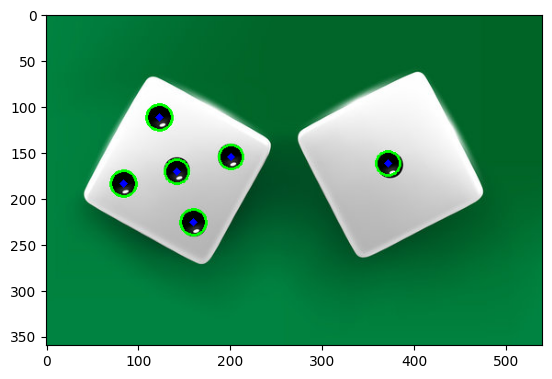

In [49]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(img_rgb,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_rgb,(int(i[0]),int(i[1])),2,(0,0,255),3)

plt.imshow(img_rgb)
plt.show()

In [50]:
contours, hierarchy = cv2.findContours(detected_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [51]:
print(len(contours))
print((hierarchy[0]))

2
[[ 1 -1 -1 -1]
 [-1  0 -1 -1]]


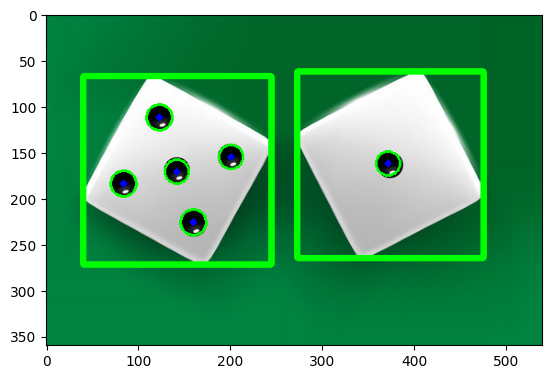

In [52]:
# since we have 2 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(img_rgb, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(img_rgb, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)


plt.imshow(img_rgb)

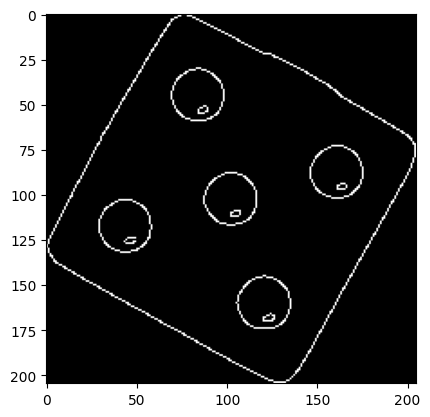

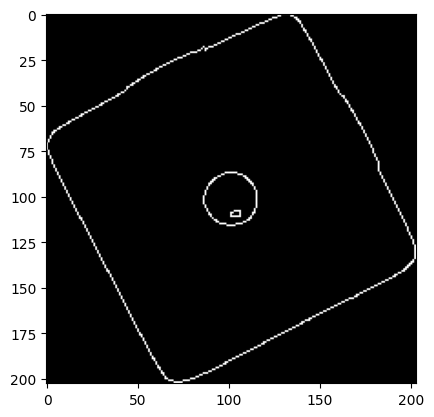

In [53]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()

In [54]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]))

5 1


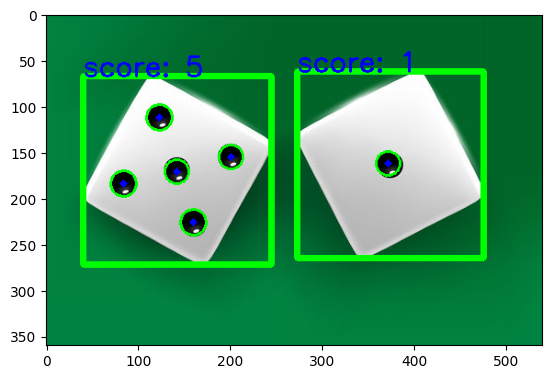

In [55]:
cv2.putText(img_rgb, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(img_rgb, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(img_rgb)
plt.show()